In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

In [4]:
from NeuralNetworkC import NeuralNetwork

In [5]:
batchSize = 128 # Batch Size = Amount of Images to load from MNIST

In [6]:
# Import MNIST Dataset
trainDataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True) # Downloads the training images and labels from MNIST database
testDataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True) # Downloads the testing images and labels from MNIST database

In [7]:
# Data Loader
# Loads [batchsize] Images and Labels from downloads
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, batch_size=batchSize, shuffle=True)
testLoader = torch.utils.data.DataLoader(dataset=testDataset, batch_size=batchSize, shuffle=False)

In [8]:
# Seperates Labels and Images
# Shape of Imgs: 100, 1, 28, 28 => Number of images, Number of Items, 28 pixel, 28 pixels
examplesTrain = iter(trainLoader)
trainImages, trainLabels = next(examplesTrain)

examplesTest = iter(testLoader)
testImages, testLabels = next(examplesTest)

In [9]:
# Reshape Images
# Shape: 100, 1, 784 => Number of images, Number of Items, 784 Pixels combined together
trainImgsReshape = trainImages.view((-1, 1, 28**2))

testImgsReshape = testImages.view((-1, 1, 28**2))

In [11]:
# Initialize Other Variables
epochs = 20
lr = 0.01 # Learning Rate
samples = trainImgsReshape.size(dim=0) # Number of Items

In [12]:
# Initialize Network and Layers
layerSizes = np.array([784, 128, 128, 10]) # layerSizes = [Nmber of Inputs, Hidden Layer, ..., Hidden Layer, Number of Ouputs]
net = NeuralNetwork(layerSizes)

In [13]:
# Get Inputs Into Single Array and Reshape
# Shape: 784, 1 => Number of Pixels Combined Together to a Vector, Number of Items
inputs = torch.empty((trainImgsReshape.size(dim=0), trainImgsReshape.size(dim=2), 1))
for i in range(samples):
    inputs[i] = trainImgsReshape[i][0].reshape((-1, 1))

In [14]:
# Get Parameters Ready
output = inputs

In [15]:
# Train Network
net.train(inputs, trainLabels, samples, epochs, lr)

<string>:57: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)


Epoch [1 / 20], Step [50/128], Loss: 0.1040, Error: 7.5301
Should Be: 5
Result Was: 7
Epoch [1 / 20], Step [100/128], Loss: 0.0781, Error: 12.0345
Should Be: 4
Result Was: 4
Accuracy of Epoch: 19.53125 %
NumCorrect: 25, NumIncorrect: 103

Epoch [2 / 20], Step [50/128], Loss: 0.0970, Error: 4.1733
Should Be: 5
Result Was: 7
Epoch [2 / 20], Step [100/128], Loss: 0.0814, Error: 8.1697
Should Be: 4
Result Was: 7
Accuracy of Epoch: 36.71875 %
NumCorrect: 47, NumIncorrect: 81

Epoch [3 / 20], Step [50/128], Loss: 0.0952, Error: 3.7632
Should Be: 5
Result Was: 0
Epoch [3 / 20], Step [100/128], Loss: 0.0777, Error: 7.3869
Should Be: 4
Result Was: 7
Accuracy of Epoch: 54.6875 %
NumCorrect: 70, NumIncorrect: 58

Epoch [4 / 20], Step [50/128], Loss: 0.0924, Error: 3.4041
Should Be: 5
Result Was: 0
Epoch [4 / 20], Step [100/128], Loss: 0.0727, Error: 6.7144
Should Be: 4
Result Was: 4
Accuracy of Epoch: 65.625 %
NumCorrect: 84, NumIncorrect: 44

Epoch [5 / 20], Step [50/128], Loss: 0.0891, Error: 3

In [21]:
# Tests the neural network on an index of the user's choice
def userTest():
    userInput = int(input('Enter a Number: '))
    
    testOutput = inputs[userInput-1]
        
    testOutput = net.forwardProp(testOutput)
    
    print('Test Output: ', testOutput)
    print(f'Label: {trainLabels[userInput]}')
    print(f'Result: {testOutput.argmax()}')
    displayImg = trainImages[userInput][0]
    plt.imshow(displayImg, cmap='gray')
    plt.show()

In [17]:
# Tests the neural network on a set of images
def fullTest(inputs):
    numberCorrect = 0
    numberIncorrect = 0
    answers = torch.empty((inputs.size(dim=0), 1))
    
    for i in range(inputs.size(dim=0)):
        testOutput = inputs[i]
    
        testOutput = net.forwardProp(testOutput)
        
        answers[i] = testOutput.argmax()
        
        if (answers[i] == testLabels[i]):
            numberCorrect += 1
        else:
            numberIncorrect += 1
    
    stop = bool(False)
    
    while (not stop):
        userInput = input('Would you like to see results? (Enter y/yes or n/no)')
        
        if (userInput == 'n' or userInput == 'no'):
            stop = bool(True)
            continue
        
        userInput = int(input('Please Enter a number position between 1-100: '))
    
        print(f'Label: {testLabels[userInput-1]}')
        print(f'Result: {answers[userInput-1].item()}')
        displayImg = testImages[userInput-1][0]
        plt.imshow(displayImg, cmap='gray')
        plt.show()
    
    print(f'NumCorrect: {numberCorrect}')
    print(f'NumIncorrect: {numberIncorrect}')
    print('This is the end of the program')

Enter a Number: 54
Test Output:  tensor([[0.1061],
        [0.0952],
        [0.0621],
        [0.0426],
        [0.1268],
        [0.4890],
        [0.1561],
        [0.0799],
        [0.0356],
        [0.0269]])
Label: 3
Result: 5


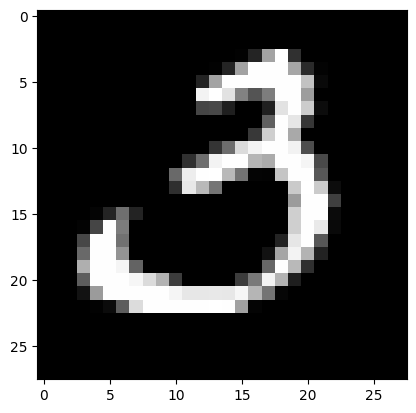

In [25]:
userTest()

In [18]:
# Test Image Inputs
samples = testImgsReshape.size(dim=0)
inputs = torch.empty((testImgsReshape.size(dim=0), testImgsReshape.size(dim=2), 1))
for i in range(samples):
    inputs[i] = testImgsReshape[i][0].reshape((-1, 1))

Would you like to see results? (Enter y/yes or n/no)y
Please Enter a number position between 1-100: 4
Label: 0
Result: 0.0


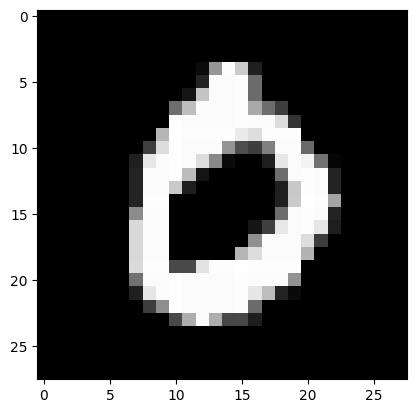

Would you like to see results? (Enter y/yes or n/no)n
NumCorrect: 62
NumIncorrect: 38
This is the end of the program


In [19]:
fullTest(inputs)

false
false
false
true
